In [1]:
# Import the necessary libraries, packages, and modules.
# Data analysis:

import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm 

# DateTime:

import datetime
import time

# Visualisation:

import matplotlib.pyplot as plt
import seaborn as sns

# Import data from the web with 'pandas_datareader'.

from pandas_datareader import data as web
import yfinance as yf  
yf.pdr_override()

# Machine Learning, predictive modelling:

import imblearn
from imblearn.over_sampling import SMOTE  

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report  

from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

import statsmodels.api as sm   
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings:

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data

cancer = pd.read_csv('LSE_DA301_Module_2_files/LSE_DA301_Module_2_files/Data/breast_cancer_data.csv', index_col='id')
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [3]:
# Data sense-checking

print(cancer.describe())
print(cancer.info())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

<AxesSubplot:>

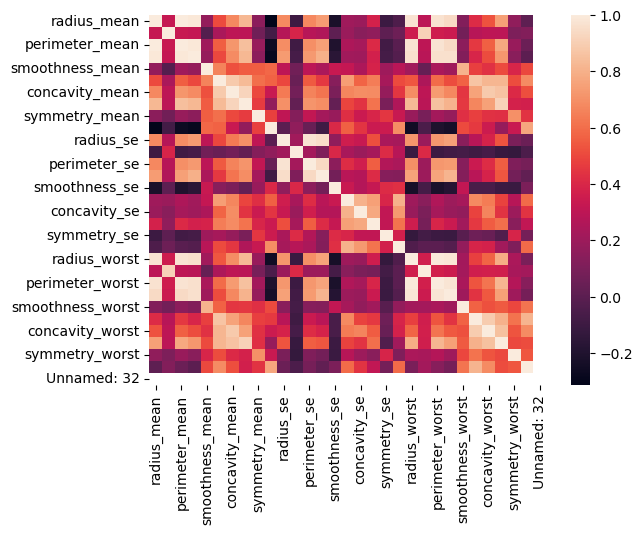

In [4]:
# Reviewing correlations

sns.heatmap(cancer.corr())

In [5]:
# Checking for NA and duplicate data

print(cancer.isnull().sum())
print(cancer.duplicated().sum())

# Column: Unnamed: 32 needs further investigation

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [6]:
# Reviewing Unnamed: 32

print(cancer['Unnamed: 32'].unique())

# Only NAN values, column can be dropped

cancer = cancer.drop(columns='Unnamed: 32')
print(cancer.columns)

# Column dropped

[nan]
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
# Fitting the regression model

y = cancer['diagnosis']
X_temp = cancer.drop(columns='diagnosis')

# Normalizing X-values using min-max scaling

X = (X_temp -np.min(X_temp))/(np.max(X_temp)-np.min(X_temp)).values

X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
842517,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
84300903,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
84348301,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
84358402,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
926682,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
926954,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909


In [8]:
# Creating a VIF dataframe

vif_values = pd.DataFrame()
vif_values['feature'] = X.columns

# Calculating VIF factors 

vif_values['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# Outputting VIF factors

vif_values.sort_values('VIF', ascending=True)

# High VIF factors sugggest multicollinearity is given. If treshold is 
# set at 10, none of the features does comply to the assumptions.
# We use only the five values with the lowest VIFs

,feature,VIF
11,texture_se,14.358562
14,smoothness_se,16.427625
18,symmetry_se,17.326806
19,fractal_dimension_se,20.939999
16,concavity_se,33.240722
8,symmetry_mean,35.273121
15,compactness_se,40.827175
9,fractal_dimension_mean,53.265699
17,concave points_se,53.569870
28,symmetry_worst,53.974145


In [9]:
# Creating variables

X2 = X[['texture_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se', 'concavity_se']]

# Creating a VIF dataframe

vif_values = pd.DataFrame()
vif_values['feature'] = X2.columns

# Calculating VIF factors 

vif_values['VIF'] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

# Outputting VIF factors

vif_values.sort_values('VIF', ascending=True)

# Keeping only columns with the lowest VIFs leads to a 
# general decrease in VIF factors in those columns that are kept

,feature,VIF
0,texture_se,4.084332
2,symmetry_se,4.408152
4,concavity_se,4.414591
1,smoothness_se,4.993741
3,fractal_dimension_se,5.381429


B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

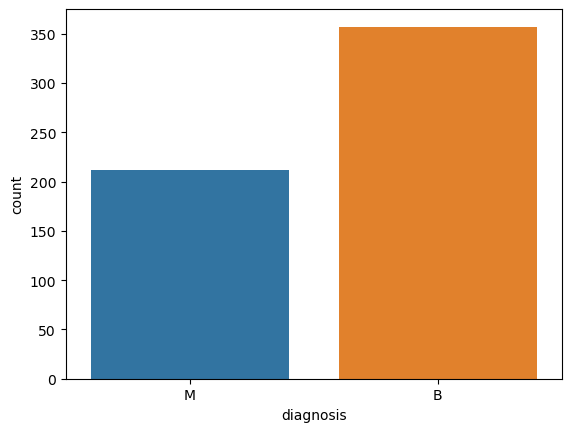

In [10]:
# Checking and visualizing the balance of the target variable

print(y.value_counts())
sns.countplot(data=cancer, x='diagnosis')

# Balance ratio of outcomes is unbalanced with a approx ratio of 2:3.5
# Imbalance is tackled with application of SMOTE, although data could
# have been used and model assessed before doing so

In [11]:
# Apply SMOTE class as the target variable is not balanced.

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

# Balance the training data

os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and for y

os_data_X = pd.DataFrame(data = os_data_X, columns = X2.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['diagnosis'])

# View DataFrame

print(os_data_X.head())
os_data_y.head()

   texture_se  smoothness_se  symmetry_se  fractal_dimension_se  concavity_se
0    0.087783       0.038243     0.076096              0.037353      0.044949
1    0.172339       0.142979     0.059070              0.109904      0.125177
2    0.254332       0.280892     0.262397              0.157166      0.133283
3    0.121199       0.121868     0.149828              0.043434      0.058611
4    0.215656       0.141245     0.182755              0.058324      0.051035


,diagnosis
0,B
1,B
2,B
3,B
4,B


diagnosis
B            249
M            249
dtype: int64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

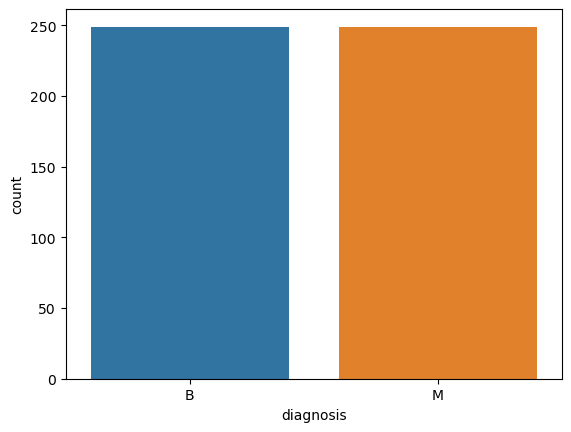

In [12]:
# Check balancing

print(os_data_y.value_counts())

# Visualizing balancing

sns.countplot(data=os_data_y, x='diagnosis')

# Balancing was conducted, balance is now equal between B and M

In [13]:
# Import necessary libraries, packages, and classes

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Create train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

# Specify and fit the model

logreg_model = LogisticRegression()
logreg_model.fit(os_data_X, os_data_y) # Using balanced training data


LogisticRegression()

In [14]:
# Calculate the predicted labels and predicted probabilities on the test set
# Predict test class:

y_pred = logreg_model.predict(X_test)


In [15]:
# Indicate the confusion matrix needs to be created

confusion_matrix = confusion_matrix(y_test, y_pred)

confusion = pd.DataFrame(confusion_matrix, index=['is_healthy', 'is_cancer'],
                         columns=['predicted_healthy', 'predicted_cancer'])

# View output

confusion

# We should focus on tuning the model to reduce false negatives
# (31) where healthy was predicted and it is cancer. 

,predicted_healthy,predicted_cancer
is_healthy,87,21
is_cancer,20,43


In [16]:
# Print the accuracy and classification report

print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7602339181286549
              precision    recall  f1-score   support

           B       0.81      0.81      0.81       108
           M       0.67      0.68      0.68        63

    accuracy                           0.76       171
   macro avg       0.74      0.74      0.74       171
weighted avg       0.76      0.76      0.76       171



In [17]:
# This code is an alternative version of the commented code above
# It is resetting the threshold to reduce false negatives
# Labels had to be remapped to avoid errors
# Comments in following cells refer to the original code!
# This code adressed the problems posed!

# Import necessary libraries, packages, and classes

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Create train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

# Specify and fit the model

logreg_model = LogisticRegression()
logreg_model.fit(os_data_X, os_data_y)  # Using balanced training data

# Calculate the predicted probabilities on the test set

y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Adjust the classification threshold to 0.4

threshold = 0.471
y_pred = (y_prob >= threshold).astype(int)

# Map the predictions back to original labels
label_mapping = {0: 'B', 1: 'M'}
y_pred_labels = [label_mapping[pred] for pred in y_pred]

# Indicate the confusion matrix needs to be created

confusion_matrix = confusion_matrix(y_test, y_pred_labels)

confusion = pd.DataFrame(confusion_matrix, index=['is_healthy', 'is_cancer'],
                         columns=['predicted_healthy', 'predicted_cancer'])

# View the output.
confusion


,predicted_healthy,predicted_cancer
is_healthy,47,61
is_cancer,3,60


<AxesSubplot:>

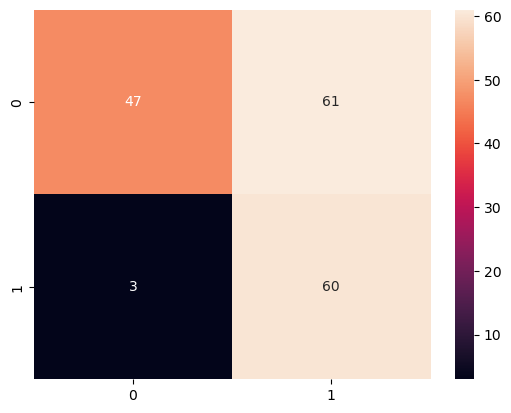

In [18]:
# Plot the confusion_matrix.

sns.heatmap(confusion_matrix, annot=True, fmt='g')


In [19]:
# Print the accuracy and classification report

print(metrics.accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

0.6257309941520468
              precision    recall  f1-score   support

           B       0.94      0.44      0.59       108
           M       0.50      0.95      0.65        63

    accuracy                           0.63       171
   macro avg       0.72      0.69      0.62       171
weighted avg       0.78      0.63      0.62       171



### Adjusting the threshold reduced false negatives at the cost of also reducing accuracy. As we eliminated some of the features due to VIF factors, BLR seems to make bad predictions. Other models should be considered, as the outcomes are not convincing.